In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [5]:
parkinsons_data=pd.read_csv('parkinsons.csv')

In [6]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
parkinsons_data.shape

(195, 24)

In [9]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
parkinsons_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [11]:
correlation=parkinsons_data.corr()

<AxesSubplot: >

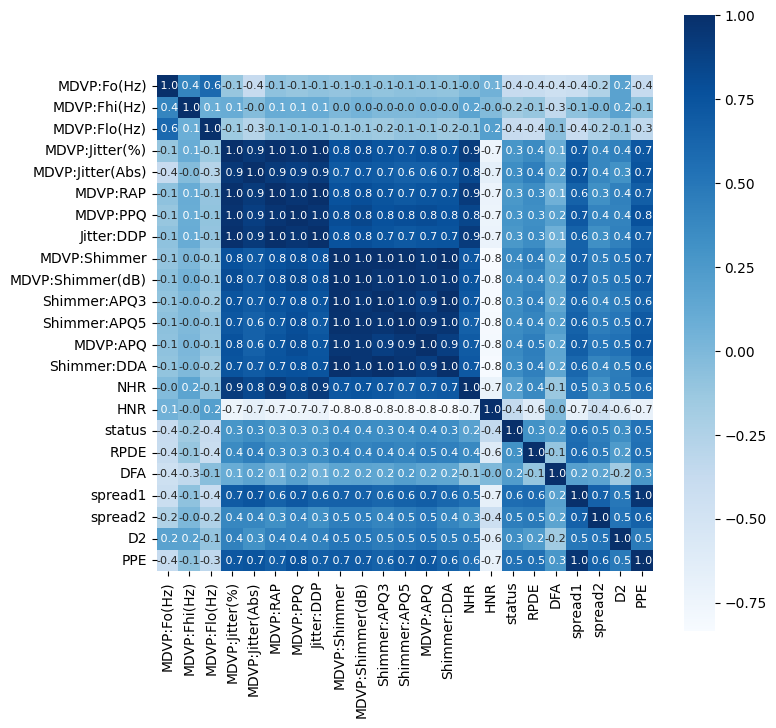

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8}, fmt=' .1f',cmap='Blues')

In [13]:
X=parkinsons_data.drop(columns=['status','name'], axis=1)
y=parkinsons_data['status']

In [14]:
X.shape

(195, 22)

In [15]:
y.shape

(195,)

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(X)

StandardScaler()

In [18]:
Standardized_data=scaler.transform(X)

In [19]:
print(Standardized_data)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


In [20]:
X=Standardized_data
y=parkinsons_data['status']

In [21]:
print(X)
print(y)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]
0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [22]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,stratify=y,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


In [24]:
print(y.shape,y_train.shape,y_test.shape)

(195,) (156,) (39,)


In [25]:
classifier=svm.SVC(kernel='linear')

In [26]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [27]:
# Accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, y_train)

In [28]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.8910256410256411


In [29]:
# Accuracy score on the test data
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction, y_test)

In [30]:
print('Accuracy score of the testing data : ',testing_data_accuracy)

Accuracy score of the testing data :  0.8974358974358975


In [31]:
input_data=(119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# Change input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

std_data =scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print('The person is not a parkinsons')

else:
    print('The person is a parkinsons')

[[-0.82929965 -0.43616456 -0.95203729  0.33491386  0.74975946  0.13296255
   0.76080023  0.13175532  0.74598495  0.73953578  0.60785907  1.11914677
   0.33298451  0.60753214 -0.06789281 -0.19322537 -0.8078385   1.76081412
   0.80132308  0.48047686 -0.21053082  0.86888575]]
[1]
The person is a parkinsons


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
import pickle

In [33]:
filename= 'parkinsons_model.sav'
pickle.dump(classifier, open(filename, 'wb'))